In [1]:
import pandas as pd 
import numpy as np
from __future__ import unicode_literals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Editing the data a bit
kick_data = pd.read_csv("/Users/briankalinowski/Kickstarter-Data-Analysis/most_backed.csv")

del kick_data['Unnamed: 0']


In [60]:
#rename some columns
kick_data.rename(columns = {'amt.pledged' : 'pledged_amount'}, inplace=True)
kick_data.rename(columns = {'pledge.tier' : 'pledge_tier'}, inplace=True)
kick_data.rename(columns = {'num.backers' : 'backers'}, inplace=True)
kick_data.rename(columns = {'num.backers.tier' : 'backers_by_tier'}, inplace=True)
kick_data.rename(columns = {'blurb' : 'pitch'}, inplace=True)

#Create a column for the number of tiers for each project. 

kick_usd = kick_data.loc[kick_data['currency'] == 'usd']
kick_tiers = [len(row.split()) for row in kick_usd['pledge_tier']]
kick_data['num_tiers'] = pd.Series(kick_tiers, index = kick_usd.index)

In [55]:
kick_data.to_csv('Kick_funded.csv')



In [61]:
# Reading in the data
kick_data = pd.read_csv("/Users/briankalinowski/Kickstarter-Data-Analysis/Kick_funded.csv")
del kick_data['Unnamed: 0']




In [62]:
#4000 of the most funded campaigns that were on Kickstarter.
kick_data.head(100)


,pledged_amount,pitch,by,category,currency,goal,location,backers,backers_by_tier,pledge_tier,title,url,num_tiers
0,8782571.0,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,4.0
1,6465690.0,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,12.0
2,5408916.0,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...,64.0
3,5702153.0,\nUPDATED: This is it. We're making a Veronica...,Rob Thomas,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...,32.0
4,3336371.0,"\nAn adventure game from Tim Schafer, Double F...",Double Fine and 2 Player Productions,Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure,9.0
5,20338986.0,\nColor e-paper smartwatch with up to 7 days o...,Pebble Technology,Product Design,usd,500000.0,"Palo Alto, CA",78471,"[10000, 22991, 5278, 19999, 6041, 4717, 4998, ...","[159.0, 179.0, 179.0, 250.0, 250.0, 338.0, 400...","Pebble Time - Awesome Smartwatch, No Compromises",/projects/597507018/pebble-time-awesome-smartw...,12.0
6,4188927.0,\nA story-driven CRPG set in the world of Mont...,inXile entertainment,Video Games,usd,900000.0,"Newport Beach, CA",74405,"[317, 14992, 11711, 10995, 4303, 3503, 10271, ...","[5.0, 20.0, 25.0, 28.0, 35.0, 39.0, 45.0, 50.0...",Torment: Tides of Numenera,/projects/inxile/torment-tides-of-numenera,28.0
7,3986929.0,"\nPillars of Eternity is an isometric, party-b...",Obsidian Entertainment,Video Games,usd,1100000.0,"Irvine, CA",73986,"[317, 25000, 20921, 8394, 5727, 3818, 769, 104...","[5.0, 20.0, 25.0, 35.0, 50.0, 65.0, 80.0, 100....",Pillars of Eternity (formerly Project Eternity),/projects/obsidian/project-eternity,21.0
8,2090104.0,\nThe creative talent behind Banjo-Kazooie and...,Playtonic Games,Video Games,gbp,175000.0,"Derby, UK",73206,"[1324, 22974, 21683, 6821, 5140, 5859, 149, 49...","[8.0, 15.0, 23.0, 31.0, 46.0, 54.0, 85.0, 85.0...",Yooka-Laylee - A 3D Platformer Rare-vival!,/projects/playtonic/yooka-laylee-a-3d-platform...,NaN
9,3007370.0,\nZNAPS is a magnetic adapter specially design...,ZNAPS,Technology,cad,120000.0,"Toronto, Canada",70122,"[11463, 13904, 97, 4699, 22858, 942, 8267, 454...","[9.0, 9.0, 13.0, 15.0, 17.0, 21.0, 24.0, 42.0,...",ZNAPS - Connection is just a snap away,/projects/1041610927/znaps-the-9-magnetic-adap...,NaN


In [58]:
kick_data.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,pledged_amount,goal,backers,num_tiers
count,4.000000e+03,4.000000e+03,4000.000000,3438.000000
mean,2.899923e+05,6.175203e+04,3582.875750,14.598313
std,7.119369e+05,1.266715e+05,7316.102809,10.200610
min,1.925000e+03,1.000000e+00,1109.000000,1.000000
25%,6.771300e+04,1.300000e+04,1406.750000,NaN
50%,1.205860e+05,3.000000e+04,1946.000000,NaN
75%,2.593680e+05,6.000000e+04,3372.000000,NaN
max,2.033899e+07,2.000000e+06,219382.000000,101.000000


In [156]:
kick_data.corr()


,pledged_amount,goal,backers,num_tiers
pledged_amount,1.000000,0.436182,0.717896,0.070394
goal,0.436182,1.000000,0.444587,0.242526
backers,0.717896,0.444587,1.000000,0.074863
num_tiers,0.070394,0.242526,0.074863,1.000000


In [87]:
kick_data.category.value_counts(ascending = False).head(25)


Product Design      773
Tabletop Games      742
Video Games         524
Hardware            182
Technology          152
Documentary         124
Gadgets             121
Design               99
Comics               79
Wearables            64
Fashion              61
Animation            49
Food                 46
DIY Electronics      42
Music                41
Film &amp; Video     40
Games                37
Art Books            34
Webcomics            33
Apparel              32
Webseries            32
Software             27
Camera Equipment     26
Sound                26
Narrative Film       25
Name: category, dtype: int64

In [162]:
kick_data["category"].value_counts().head(10)
kick_data.sort_values(by='pledged_amount', ascending=0)

#Total $ amount pledged by each category. 
pledged = kick_data['pledged_amount'].groupby(kick_data['category'])
pledged.sum().sort_values(ascending=0)


category
Product Design       279491110.0
Tabletop Games       204123729.0
Video Games          142837755.0
Hardware              72514425.0
Technology            64281911.0
Gadgets               34236825.0
Wearables             28070833.0
Design                20655212.0
Sound                 20168046.0
Documentary           18710546.0
3D Printing           17087619.0
Narrative Film        15780248.0
Food                  14146976.0
Gaming Hardware       13295440.0
Fashion               13198460.0
Animation             11349738.0
Comics                11122271.0
DIY Electronics       10922092.0
Camera Equipment      10749860.0
Apparel               10387585.0
Games                  9194800.0
Film &amp; Video       7419144.0
Web                    6364330.0
Robots                 6256198.0
Television             5764229.0
Music                  5478068.0
Art                    5442301.0
Space Exploration      4777354.0
Art Books              4737943.0
Webseries              4503641.0
 

In [88]:
kick_data.location.value_counts(ascending = False).head(25)



San Francisco, CA     280
Los Angeles, CA       271
New York, NY          212
Seattle, WA           147
London, UK            132
Chicago, IL           121
Brooklyn, NY          103
Portland, OR           84
San Diego, CA          62
Toronto, Canada        60
Austin, TX             60
Boston, MA             56
Salt Lake City, UT     48
Atlanta, GA            43
Dallas, TX             39
St. Louis, MO          30
Washington, DC         30
Oakland, CA            29
Cambridge, MA          28
Montreal, Canada       28
San Jose, CA           27
Paris, France          26
Melbourne, AU          25
Tokyo, Japan           25
Vancouver, Canada      25
Name: location, dtype: int64

In [71]:
kick_data["location"].value_counts().head(10)
kick_data.sort_values(by='pledged_amount', ascending=0)

#Total $ amount pledged sorted by location. 
locations = kick_data['pledged_amount'].groupby(kick_data['location'])
locations.sum().sort_values(ascending=0)



location
San Francisco, CA          118248416.0
Los Angeles, CA             84925833.0
New York, NY                57965127.0
Palo Alto, CA               38874527.0
Chicago, IL                 32457645.0
Seattle, WA                 30013277.0
Atlanta, GA                 28507327.0
Portland, OR                27449288.0
San Diego, CA               24007284.0
London, UK                  23347429.0
Brooklyn, NY                23113740.0
Tokyo, Japan                22666362.0
Austin, TX                  18913669.0
Toronto, Canada             18099535.0
Boston, MA                  15831756.0
Stockholm, Sweden           15079053.0
Redwood City, CA            14364656.0
Minneapolis, MN             13154687.0
Salt Lake City, UT          11405641.0
Denver, CO                  11106495.0
Newport Beach, CA           10034366.0
Dallas, TX                   9813598.0
Denton, TX                   9508647.0
Cambridge, MA                9436478.0
San Jose, CA                 8286839.0
Melbourne, AU   

In [94]:
kick_data["category"].value_counts().head(10)
kick_data.sort_values(by='backers', ascending=0)

# Total backers based on category.
pledged = kick_data['backers'].groupby(kick_data['category'])
pledged.sum().sort_values(ascending=0)

category
Video Games             3000001
Product Design          2801518
Tabletop Games          2460853
Hardware                 624712
Technology               568784
Gadgets                  355290
Documentary              290974
Design                   279935
Narrative Film           217480
Comics                   211310
Wearables                203211
Fashion                  202598
Animation                178891
Food                     161523
DIY Electronics          139711
Web                      127791
Music                    113876
Sound                    105782
Film &amp; Video         101835
Games                     98998
Gaming Hardware           86568
Apparel                   85561
Webseries                 82706
3D Printing               78065
Radio &amp; Podcasts      76904
Art Books                 71773
Space Exploration         69478
Software                  68554
Webcomics                 66316
Graphic Design            65430
                         ...   

# Linear Regression

In [345]:
#keep only the columns we need for linear regression.

kick_train = kick_data.drop(['pitch','by','currency', 'num_tiers','location','backers_by_tier','pledge_tier', 'url'], axis=1)

In [346]:
train_cols = ['title', 'category', 'backers', 'goal', 'pledged_amount']
kick_train = kick_train.reindex(columns= train_cols)

In [381]:
kick_train['percent_funded'] =(kick_train.pledged_amount / kick_train.goal)

for value in kick_train.percent_funded:
    np.around(value, decimals=1)
    
kick_train.head(10)

,title,category,backers,goal,pledged_amount,percent_funded
0,Exploding Kittens,Tabletop Games,219382,10000.0,8782571.0,878.257100
1,Fidget Cube: A Vinyl Desk Toy,Product Design,154926,15000.0,6465690.0,431.046000
2,"Bring Reading Rainbow Back for Every Child, Ev...",Web,105857,1000000.0,5408916.0,5.408916
3,The Veronica Mars Movie Project,Narrative Film,91585,2000000.0,5702153.0,2.851077
4,Double Fine Adventure,Video Games,87142,400000.0,3336371.0,8.340927
5,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,78471,500000.0,20338986.0,40.677972
6,Torment: Tides of Numenera,Video Games,74405,900000.0,4188927.0,4.654363
7,Pillars of Eternity (formerly Project Eternity),Video Games,73986,1100000.0,3986929.0,3.624481
8,Yooka-Laylee - A 3D Platformer Rare-vival!,Video Games,73206,175000.0,2090104.0,11.943451
9,ZNAPS - Connection is just a snap away,Technology,70122,120000.0,3007370.0,25.061417


In [382]:
kick_train.corr()

,backers,goal,pledged_amount,percent_funded
backers,1.000000,0.444587,0.717896,0.004182
goal,0.444587,1.000000,0.436182,-0.015837
pledged_amount,0.717896,0.436182,1.000000,-0.003536
percent_funded,0.004182,-0.015837,-0.003536,1.000000


In [372]:
log_columns = ['backers', 'pledged_amount']
log_kick = kick_train.copy()
log_kick[log_columns] = log_kick[log_columns].apply(np.log10)

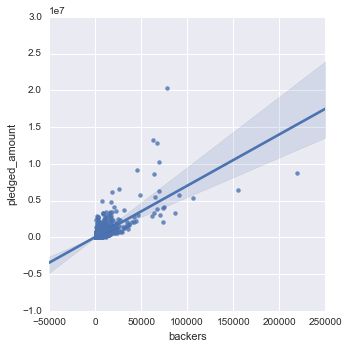

In [374]:
sns.lmplot('backers', 'pledged_amount', kick_train)

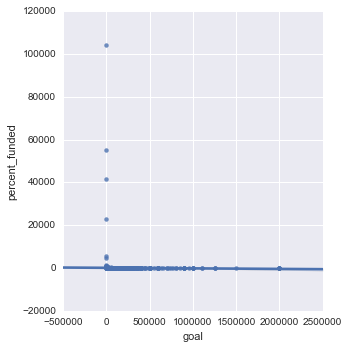

In [380]:
sns.lmplot('goal', 'percent_funded', kick_train)

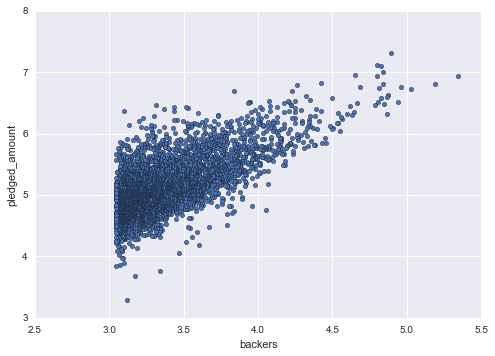

In [274]:
log_kick.plot(kind='scatter', x='backers', y='pledged_amount')


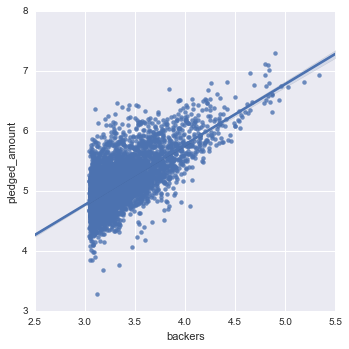

In [248]:
sns.lmplot(x="backers", y="pledged_amount", data=log_kick)
sns.plt.show()

In [253]:
from sklearn import linear_model

X = log_kick[["backers"]]
Y = log_kick["pledged_amount"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, Y)

# Print the coefficients
print results.intercept_, results.coef_

1.74944818291 [ 1.00684935]


In [265]:
import statsmodels.api as sm

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         pledged_amount   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 7.895e+05
Date:                Wed, 23 Nov 2016   Prob (F-statistic):               0.00
Time:                        20:25:48   Log-Likelihood:                -1667.8
No. Observations:                4000   AIC:                             3338.
Df Residuals:                    3999   BIC:                             3344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
backers        1.5203      0.002    888.520      0.0

In [263]:
dummies = pd.get_dummies(kick_train["category"])
dummies.head()

,3D Printing,Academic,Accessories,Action,Animation,Anthologies,Apparel,Apps,Architecture,Art,...,Vegan,Video,Video Games,Wearables,Web,Webcomics,Webseries,World Music,Young Adult,Zines
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
def plot_category(category):
    kick_test = kick_train.loc[kick_data['category'] == category]
    kick_test.plot(kind='scatter', x='backers', y='pledged_amount')
    X = kick_test[["backers"]]
    Y = kick_test["pledged_amount"]


In [306]:
# a function to fit a regression on each category

def ols_reg(category):
    kick_test = kick_train.loc[kick_data['category'] == category]
    X = kick_test[["backers"]]
    Y = kick_test["pledged_amount"]
    model = sm.OLS(Y, X)
    results = model.fit()
    print results.rsquared


0.329222300202


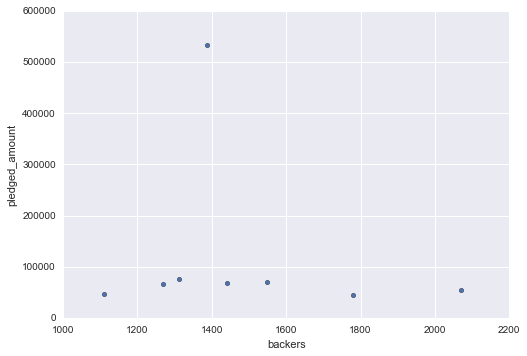

In [337]:
c = 'Journalism'
ols_reg(c)
plot_category(c)

In [332]:
CK = kick_data.category.unique()
CK



array(['Tabletop Games', 'Product Design', 'Web', 'Narrative Film',
       'Video Games', 'Technology', 'Gaming Hardware', 'Television',
       'Hardware', 'Music', 'Space Exploration', 'Radio &amp; Podcasts',
       'Flight', 'Sound', 'Animation', 'Games', 'Action', 'Gadgets',
       'Documentary', '3D Printing', 'DIY Electronics', 'Publishing',
       'Fashion', 'Comics', 'Typography', "Children's Books", 'Apparel',
       'Food', 'Crafts', 'Camera Equipment', 'Comedy', 'Design',
       'Graphic Design', 'Apps', 'Hip-Hop', 'World Music',
       'Film &amp; Video', 'Drinks', 'Wearables', 'Accessories',
       'Footwear', 'Science Fiction', 'Art Books', 'Nonfiction', 'Robots',
       'Art', 'Software', 'Chiptune', 'Webseries', 'Webcomics', 'Rock',
       'Playing Cards', 'Cookbooks', 'Fantasy', 'Photography',
       'Anthologies', 'Faith', 'Mixed Media', 'Metal', 'Small Batch',
       'Classical Music', 'Architecture', 'Pop', 'Dance',
       'Electronic Music', 'Graphic Novels', 'Music

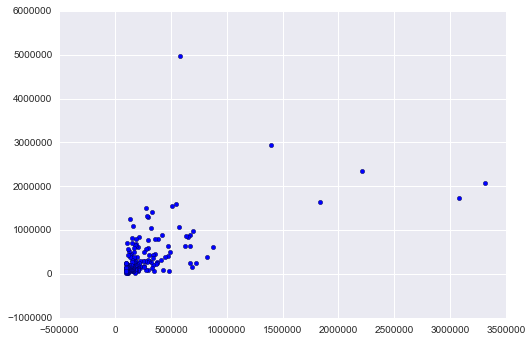

Predictions: [ 3309981.23370387  3077462.58232715  2213654.53741414  1838646.04678065
  1399964.76244523   876609.53957319   820383.36694809   722489.5842526
   699396.69192444   686093.17786582   670948.92601293   670865.25611319
   670614.24641397   652123.19857149   636393.25742042   629448.65574202
   580250.75469505   575565.24030963   548288.85299448   508796.66031732
   486289.45728733   481436.60310243   476165.39941883   470392.17633678
   441693.40072606   426047.12947472   415421.05220778   408560.12042912
   381702.08261267   374339.13143557   371829.03444338   365721.13176238
   358023.50098632   355178.72439517   343632.27823109   339699.79294332
   335516.29795633   333926.56986128   330328.76417247   327651.3273808
   323216.82269459   318029.28891073   303136.04675706   301964.6681607
   295020.0664823    294099.69758516   291171.25109427   290752.90159558
   289665.19289896   284393.98921536   283724.63001744   278704.43603305
   276361.67884034   271425.1547557    26

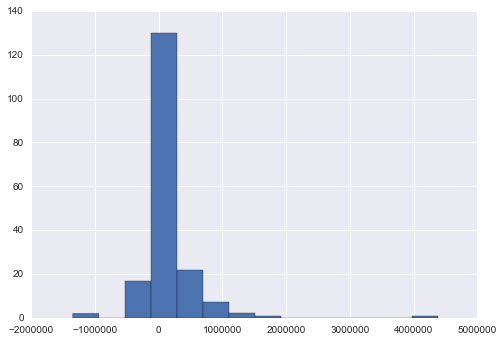

In [338]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, Y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, Y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    # algo = linearmodel object
    algo.fit(X,Y)
    predictions = algo.predict(X)
    plt.scatter(predictions, Y)
    plt.show()
    print "Predictions: " + str(predictions)
    residuals = (Y-algo.predict(X)).values
    print "Residual: " + str(residuals)

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,Y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(Y))))
    # keep the model
    return algo

X = kick_test[['backers']]
Y = kick_test['pledged_amount']
lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X, Y, lm)

In [342]:
kick_live = pd.read_csv("/Users/briankalinowski/Kickstarter-Data-Analysis/live.csv")
del kick_live['Unnamed: 0']

In [344]:
kick_live.head(50)

,amt.pledged,blurb,by,country,currency,end.time,location,percentage.funded,state,title,type,url
0,15823.0,"\n'Catalysts, Explorers & Secret Keepers: Wome...",Museum of Science Fiction,US,usd,2016-11-01T23:59:00-04:00,"Washington, DC",186,DC,"Catalysts, Explorers & Secret Keepers: Women o...",Town,/projects/1608905146/catalysts-explorers-and-s...
1,6859.0,\nA unique handmade picture book for kids & ar...,"Tyrone Wells & Broken Eagle, LLC",US,usd,2016-11-25T01:13:33-05:00,"Portland, OR",8,OR,The Whatamagump (a hand-crafted story picture ...,Town,/projects/thewhatamagump/the-whatamagump-a-han...
2,17906.0,\nA horror comedy about a repairman who was in...,Tessa Stone,US,usd,2016-11-23T23:00:00-05:00,"Los Angeles, CA",102,CA,Not Drunk Enough Volume 1!,Town,/projects/1890925998/not-drunk-enough-volume-1...
3,67081.0,\nThe Johnny Wander autobio omnibus you've all...,Johnny Wander,US,usd,2016-11-01T23:50:00-04:00,"Brooklyn, NY",191,NY,Our Cats Are More Famous Than Us: A Johnny Wan...,County,/projects/746734715/our-cats-are-more-famous-t...
4,32772.0,\nThe vision for this project is the establish...,Beau's All Natural Brewing Company,RW,cad,2016-11-18T23:05:48-05:00,"Kigali, Rwanda",34,Kigali Province,The Rwanda Craft Brewery Project,Town,/projects/beaus/the-rwanda-craft-brewery-proje...
5,2065.0,"\nIn Shiraz, traditional and modern family rec...",Shireen Rahimi,US,usd,2016-11-28T00:00:00-05:00,"Miami, FL",114,FL,Shiraz the Cookbook,Town,/projects/844448164/shiraz-the-cookbook?ref=di...
6,577844.0,\nPolygons is the origami-like measuring spoon...,Polygons Design,US,usd,2016-11-20T11:57:34-05:00,"Wilmington, DE",5778,DE,Polygons | The Flat 4-in-1 Measuring Spoon,Town,/projects/stillalive/polygons-the-flat-4-in-1-...
7,4952.0,\nThis hardcover coffee table book showcases a...,Lee White,US,usd,2016-11-28T15:00:00-05:00,"Portland, OR",42,OR,Illumination: The Art of Lee White,Town,/projects/987803560/illumination-the-art-of-le...
8,45959.0,\nA heartfelt film exploring families and rela...,Justin Chon,US,usd,2016-11-09T19:27:32-05:00,"Los Angeles, CA",153,CA,GOOK - A Korean American LA Riots Film,Town,/projects/2084768431/gook-a-korean-american-la...
9,214035.0,\nA Smartphone Mount That Helps You Capture Th...,Stacked,US,usd,2016-10-30T06:21:30-04:00,"Los Angeles, CA",611,CA,Picbot - An Automated Motorized Picture And Vi...,Town,/projects/1597931194/picbot-an-automated-motor...


In [ ]:
d